In [89]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Question 8

In [90]:
# load data
auto = pd.read_csv('../../data/auto.csv', index_col='name', na_values=['?'])
auto.dropna(inplace=True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [91]:
x = sm.add_constant(auto['horsepower'])
y = auto['mpg']

linear_model = sm.OLS(y, x).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        13:37:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Is there a relationship between the predictor and the response?
The p-value of predictor is less, so we can say that there is significant relationship.

ii. How strong is the relationship between the predictor and the response?
p-value << 0.000 indicates a strong relationship between hourserpower and mpg value.

iii. Is the relationship between the predictor and the response positive or negative?
The coefficient of predictor is negative so the relationship is also negative.

In [92]:
# What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
lm = LinearRegression(fit_intercept=True)

x = auto['horsepower'].values.reshape(-1, 1)
y = auto['mpg']
lm.fit(x, y)
print(lm.intercept_, lm.coef_)

print(lm.predict(np.array([98]).reshape(-1, 1)))

39.93586102117047 [-0.15784473]
[24.46707715]


<Axes: xlabel='horsepower', ylabel='mpg'>

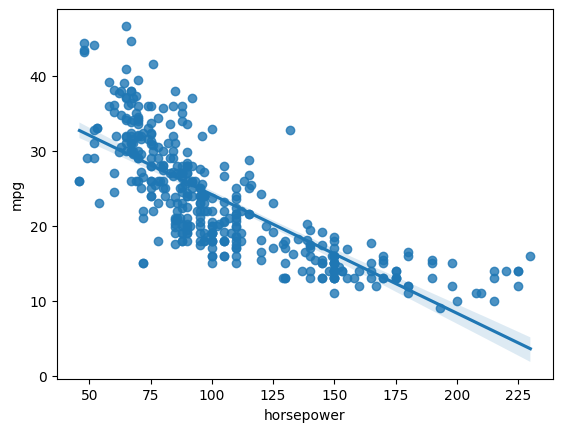

In [93]:
sns.regplot(x='horsepower', y='mpg', data=auto)

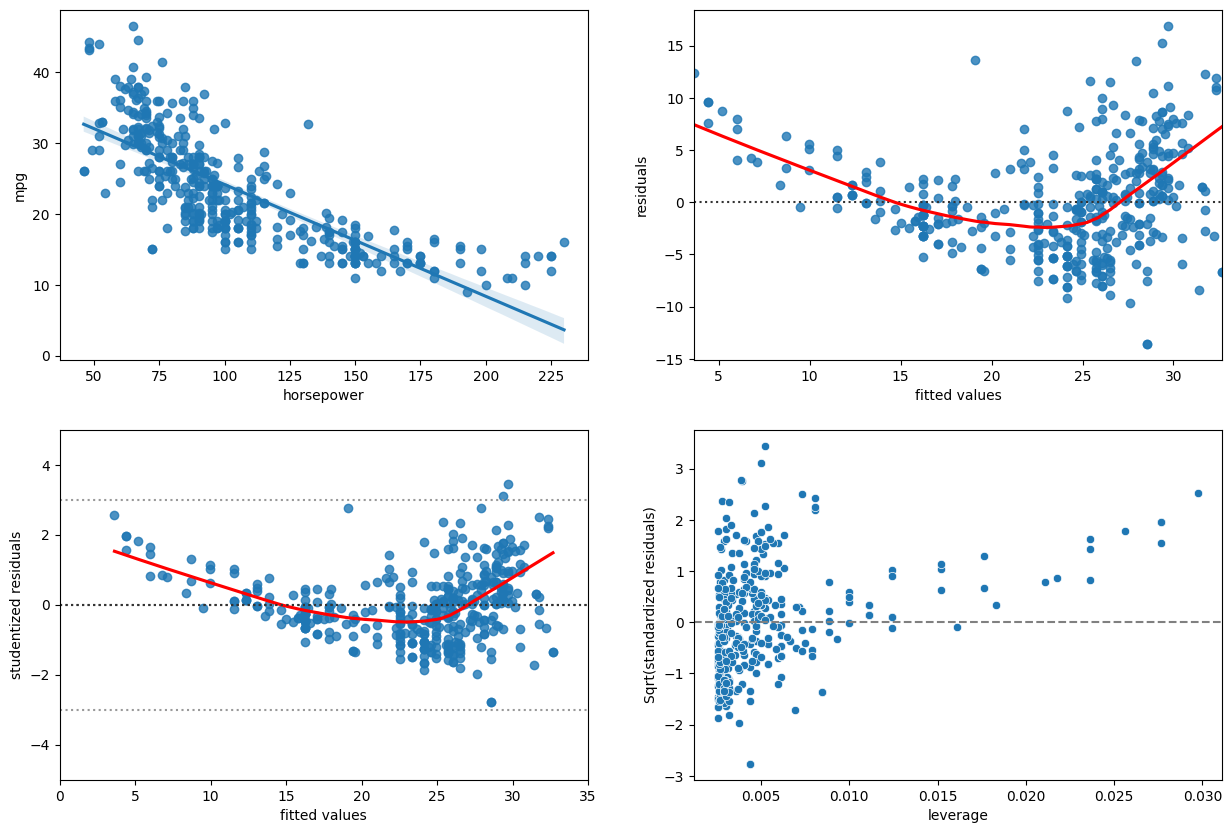

In [94]:
y_pred = linear_model.predict(sm.add_constant(auto['horsepower']))
residuals = linear_model.resid # residual
stud_resid = linear_model.get_influence().resid_studentized_internal # studentized residuals

f, axes = plt.subplots(2, 2, sharex=False, sharey=False)
f.set_figheight(10)
f.set_figwidth(15)

ax1 = sns.regplot(x='horsepower', y='mpg', data=auto, ax=axes[0,0])

ax2 = sns.residplot(x=y_pred, y=residuals, ax=axes[0, 1], lowess=True, line_kws=dict(color="r"))
ax2.set_xlabel('fitted values')
ax2.set_ylabel('residuals')

ax2 = sns.residplot(x=y_pred, y=stud_resid, ax=axes[1, 0], lowess=True, line_kws=dict(color="r"))
ax2.set_xlabel('fitted values')
ax2.set_ylabel('studentized residuals')
ax2.axhline(0, ls=":", c=".2")
ax2.axhline(-3, ls=":", c=".6")
ax2.axhline(3, ls=":", c=".6")
ax2.set_xlim(0, 35)
ax2.set_ylim(-5, 5)

# leverage plot
stand_resids = linear_model.resid_pearson
leverage = linear_model.get_influence().hat_matrix_diag
ax3 = sns.scatterplot(x=leverage, y=stand_resids, ax=axes[1, 1])
ax3.set_xlabel('leverage')
ax3.set_ylabel('Sqrt(standardized residuals)')
ax3.axhline(y=0, color='grey', linestyle='dashed')


### Question 9

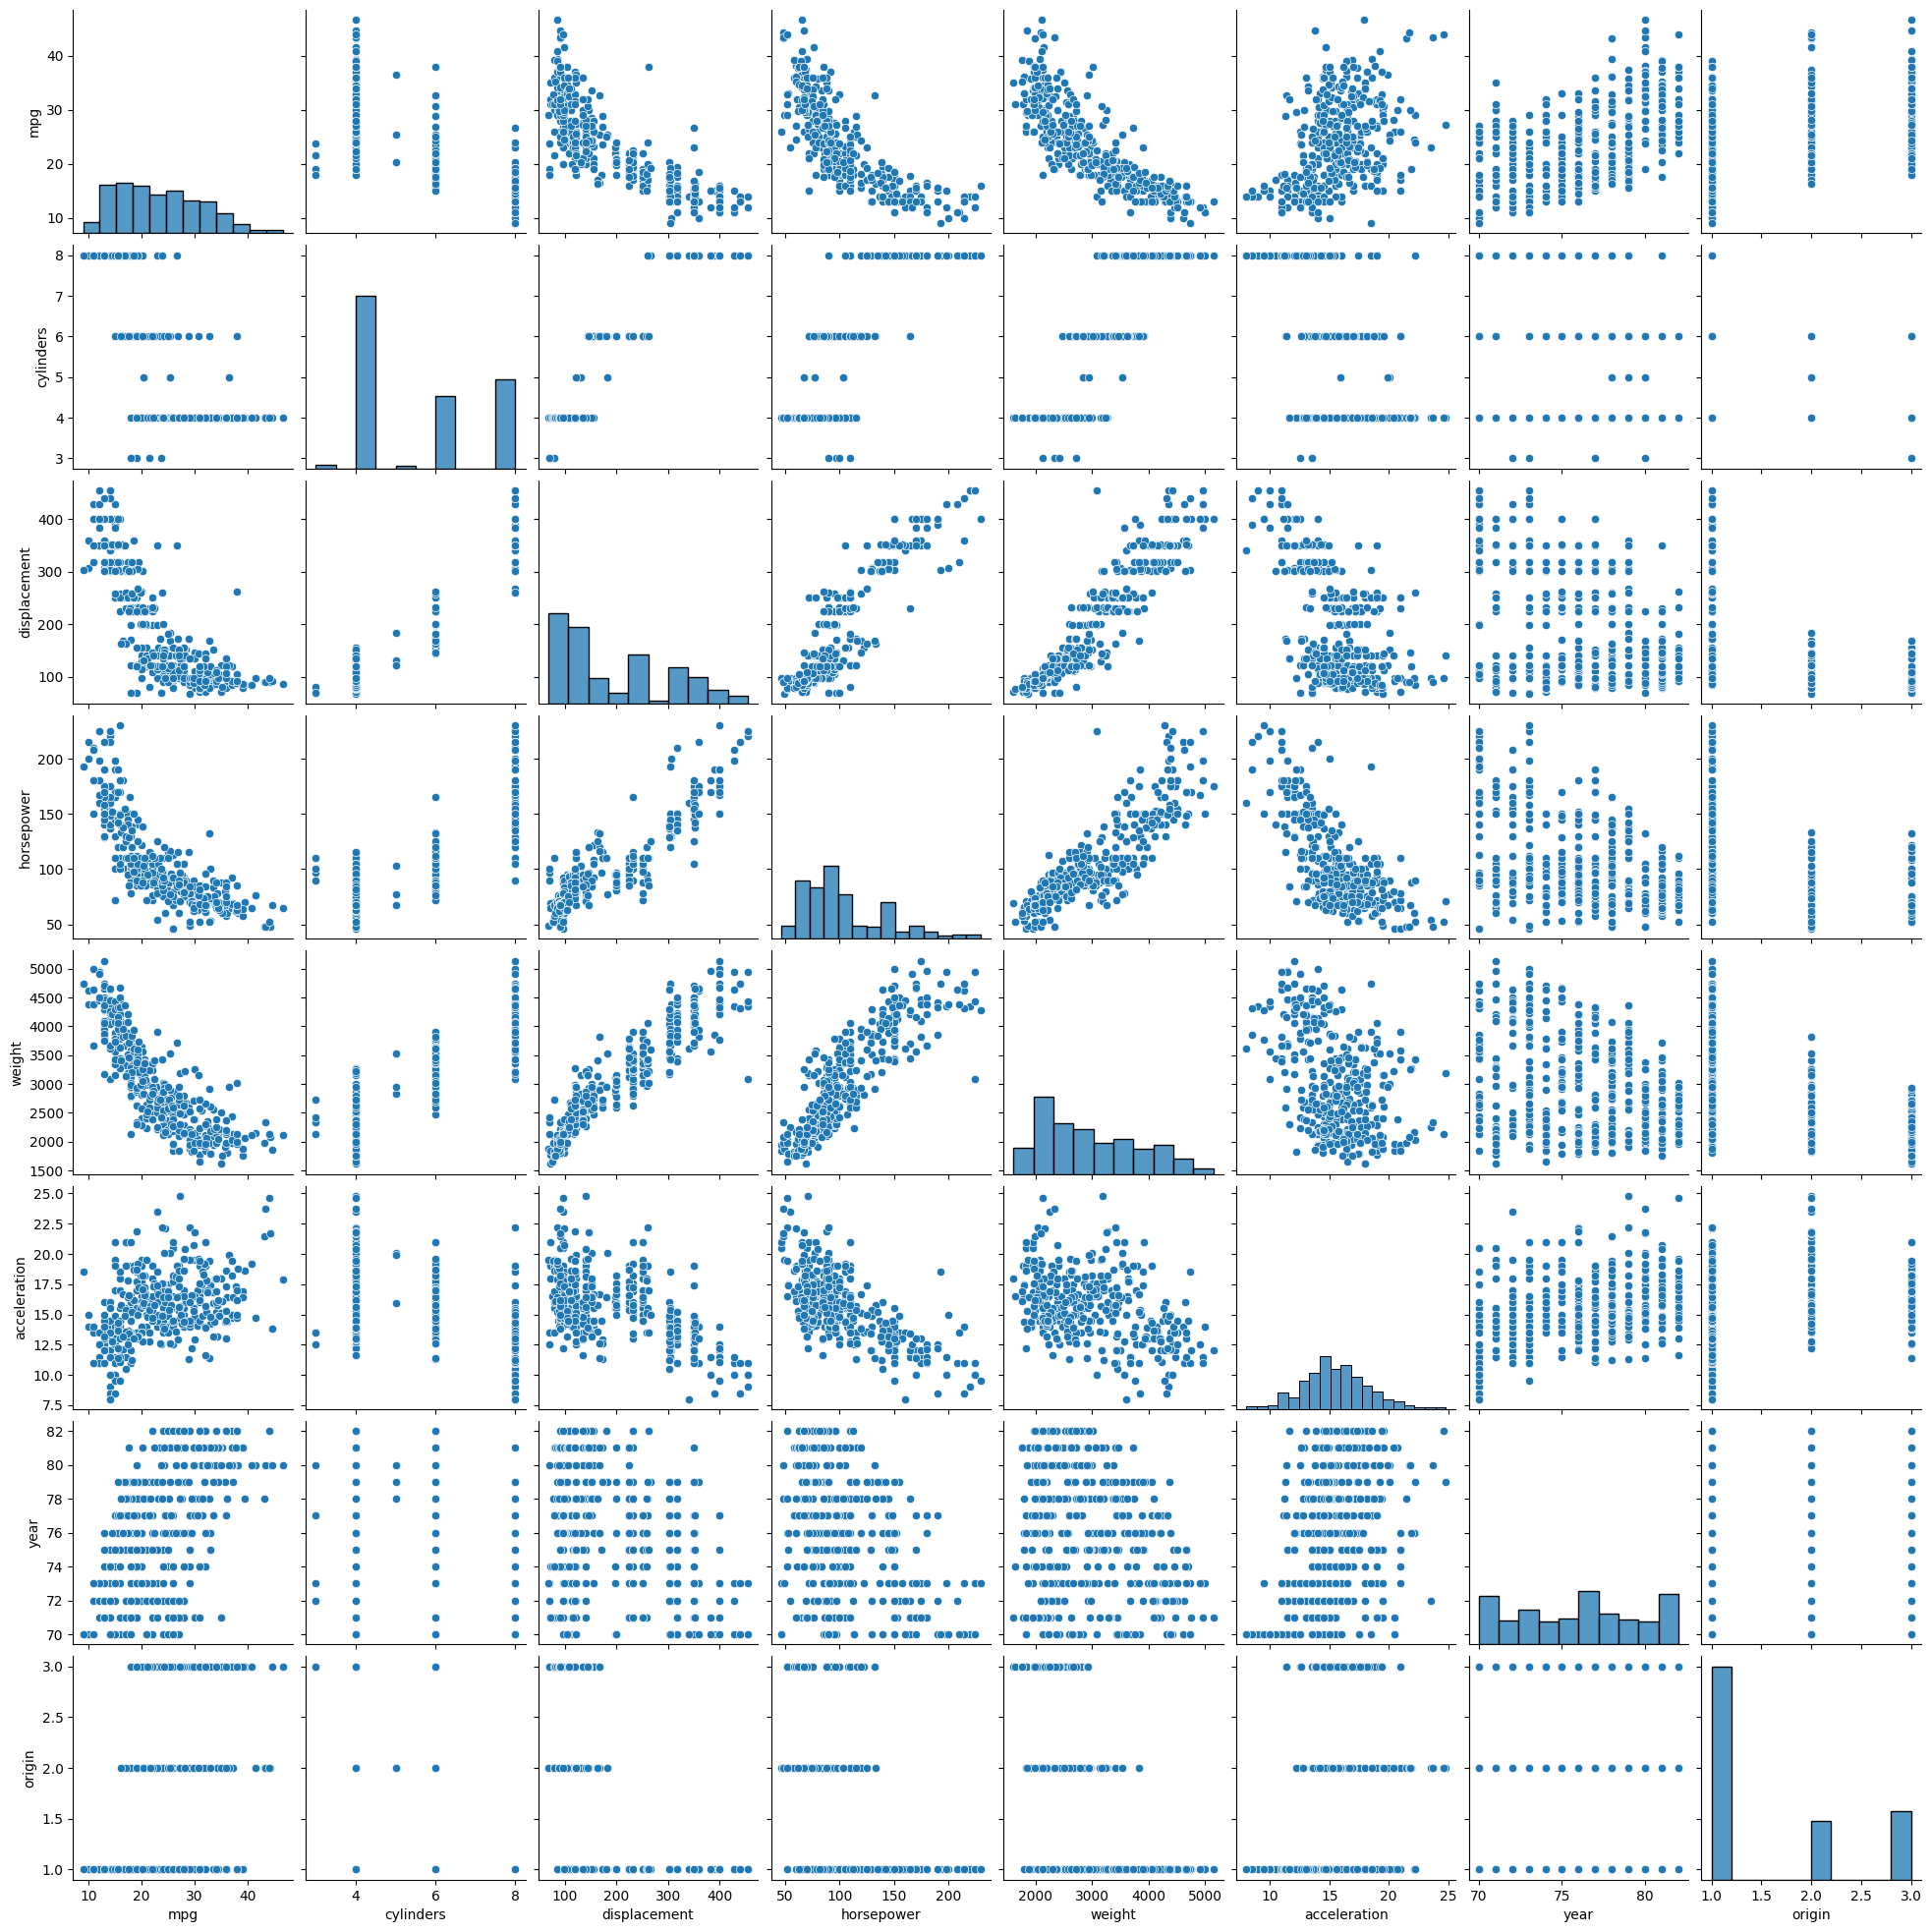

In [95]:
sns.pairplot(auto)

In [96]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [97]:
x_multiple = sm.add_constant(auto.drop(['mpg'], axis=1))
y_multiple = auto['mpg']
multiple_model = sm.OLS(y_multiple, x_multiple).fit()

multiple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.04e-139
Time:                        13:37:40   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. Is there a relationship between the predictors and the response? 
Except some predictors, others have relationship to the response. (p-values)

ii. Which predictors appear to have a statistically significant relationship to the response?
`displacement`, `weight`, `year`, `origin` 

iii. What does the coefficient for the `year` variable suggest?
One unit change in year variable results 0.7508 unit change in the response.

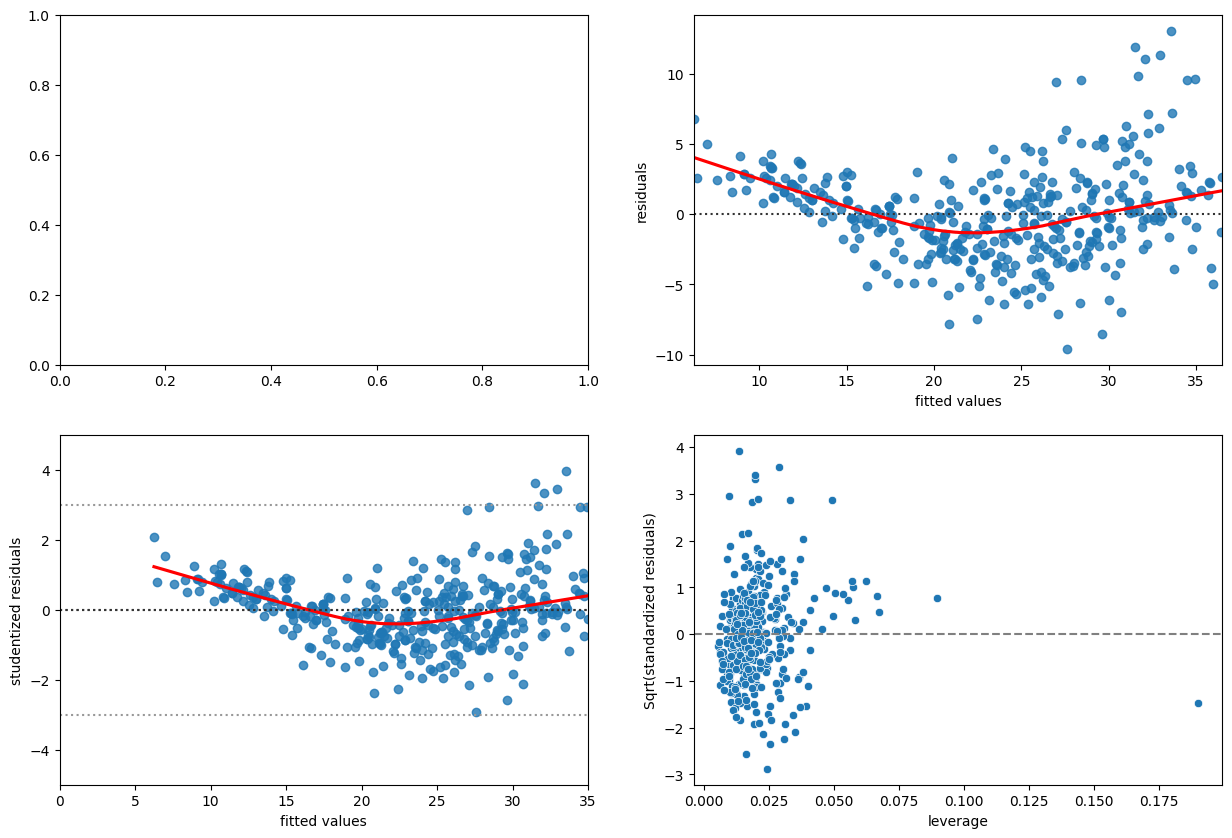

In [98]:
y_pred = multiple_model.predict(sm.add_constant(auto.drop(['mpg'], axis=1)))
residuals = multiple_model.resid # residual
stud_resid = multiple_model.get_influence().resid_studentized_internal # studentized residuals

f, axes = plt.subplots(2, 2, sharex=False, sharey=False)
f.set_figheight(10)
f.set_figwidth(15)

ax2 = sns.residplot(x=y_pred, y=residuals, ax=axes[0, 1], lowess=True, line_kws=dict(color="r"))
ax2.set_xlabel('fitted values')
ax2.set_ylabel('residuals')

ax2 = sns.residplot(x=y_pred, y=stud_resid, ax=axes[1, 0], lowess=True, line_kws=dict(color="r"))
ax2.set_xlabel('fitted values')
ax2.set_ylabel('studentized residuals')
ax2.axhline(0, ls=":", c=".2")
ax2.axhline(-3, ls=":", c=".6")
ax2.axhline(3, ls=":", c=".6")
ax2.set_xlim(0, 35)
ax2.set_ylim(-5, 5)

# leverage plot
stand_resids = multiple_model.resid_pearson
leverage = multiple_model.get_influence().hat_matrix_diag
ax3 = sns.scatterplot(x=leverage, y=stand_resids, ax=axes[1, 1])
ax3.set_xlabel('leverage')
ax3.set_ylabel('Sqrt(standardized residuals)')
ax3.axhline(y=0, color='grey', linestyle='dashed')


In [99]:
def create_ols_formula(data, response):
    formula = f'{response} ~'
    for col_name in data.columns:
            if col_name != response:
                formula += f'{col_name}+'
    return formula[:-1]

In [100]:
# add interaction terms
formula = create_ols_formula(auto, 'mpg')
interaction_model = smf.ols(formula=formula + '+ horsepower:weight + displacement:acceleration', data=auto).fit()

interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.32e-160
Time:                        13:37:41   Log-Likelihood:                -968.13
No. Observations:                 392   AIC:                             1956.
Df Residuals:                     382   BIC:                             1996.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -6.0876      5.275     -1.154      0.249     -16.459       4.284
cylinders                     0.1321      0.289      0.457      0.648      -0.437       0.701
displacement                  0.0315      0.010      3.014      0.003       0.011       0.052
horsepower                   -0.2172      0.024     -9.138      0.000      -0.264      -0.170
weight                       -0.0095      0.001    -10.411      0.000      -0.011      -0.008
acceleration                  0.2483      0.138      1.801      0.072      -0.023       0.519
year                          0.7766      0.044     17.465      0.000       0.689       0.864
origin                        0.7507      0.250      3.006      0.003       0.260       1.242
horsepower:weight          4.706e-05   5.78e-06      8.145      0.000    3.57e-05    5.84e-05
displacement:acceleration    -0.0023      0.001     -3.178      0.002      -0.004      -0.001
==============================================================================
Omnibus:                       38.524   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.918
Skew:                           0.601   Prob(JB):                     1.79e-15
Kurtosis:                       4.647   Cond. No.                     1.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Low p-values associated with both interaction terms are indicating that these terms are statistically significant

In [101]:
# Try a few different transformations of the variables, such as log(x), sqrt(x), or x^2

trans_model = smf.ols(formula='mpg ~ np.log(cylinders) + displacement + np.power(horsepower, 2) + weight + acceleration \
                            + year + origin', data=auto).fit()
trans_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          3.25e-140
Time:                        13:37:41   Log-Likelihood:                -1021.6
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     384   BIC:                             2091.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -19.7081      4.651     -4.237      0.000     -28.853     -10.563
np.log(cylinders)          -2.6596      1.756     -1.514      0.131      -6.112       0.793
displacement                0.0140      0.008      1.793      0.074      -0.001       0.029
np.power(horsepower, 2)  7.318e-05   4.32e-05      1.693      0.091   -1.18e-05       0.000
weight                     -0.0071      0.001    -11.901      0.000      -0.008      -0.006
acceleration                0.2329      0.087      2.690      0.007       0.063       0.403
year                        0.7827      0.050     15.518      0.000       0.684       0.882
origin                      1.1981      0.279      4.296      0.000       0.650       1.746
==============================================================================
Omnibus:                       28.821   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.630
Skew:                           0.472   Prob(JB):                     1.67e-11
Kurtosis:                       4.465   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 10

In [102]:
carseats = pd.read_csv('../../data/carseats.csv', na_values=['?'])
carseats.dropna(inplace=True)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [103]:
carseats_ml = smf.ols(formula='Sales ~ Price + Urban + US', data=carseats).fit()
carseats_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.39e-23
Time:                        13:37:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### - If Urban, sales decrease by 0.0219, however, the p value indicates that it is not statistically significant.
##### - If US, sales increase by 1.2006, statisticaly significant
##### - One unit change in Price results in a 0.0545 unit reduction in Sales

(c)

$$ \hat{\text{sales}} = 13.0435	- 0.0219 \times \text{Urban} + 1.2006 \times \text{US} - 0.0545 \times \text{Price} $$

(d)

If a predictor provides a small p-value ($\text{p-value} < \alpha$), then we can reject the null hypthesis:
- We can reject the null hypothesis for `US[T.Yes]` and `Price` predictors,
- but we cannot reject the null hypothesis for `Urban[T.Yes]`

In [104]:
carseats_ml = smf.ols(formula='Sales ~ Price + US', data=carseats).fit()
carseats_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.66e-24
Time:                        13:37:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f)

If we look at the $R^2$ values on the summary tables of these two models, we find:
    
$R^2$ (model with predictors: Urban, US, Price) = 0.239
    
$R^2$ (model with predictors: US, Price) = 0.239
    
Both of the models do not fit the data well.

In [105]:
# 95% confidence intervals for the coefficient(s) of model with predictors US and Price

carseats_ml.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


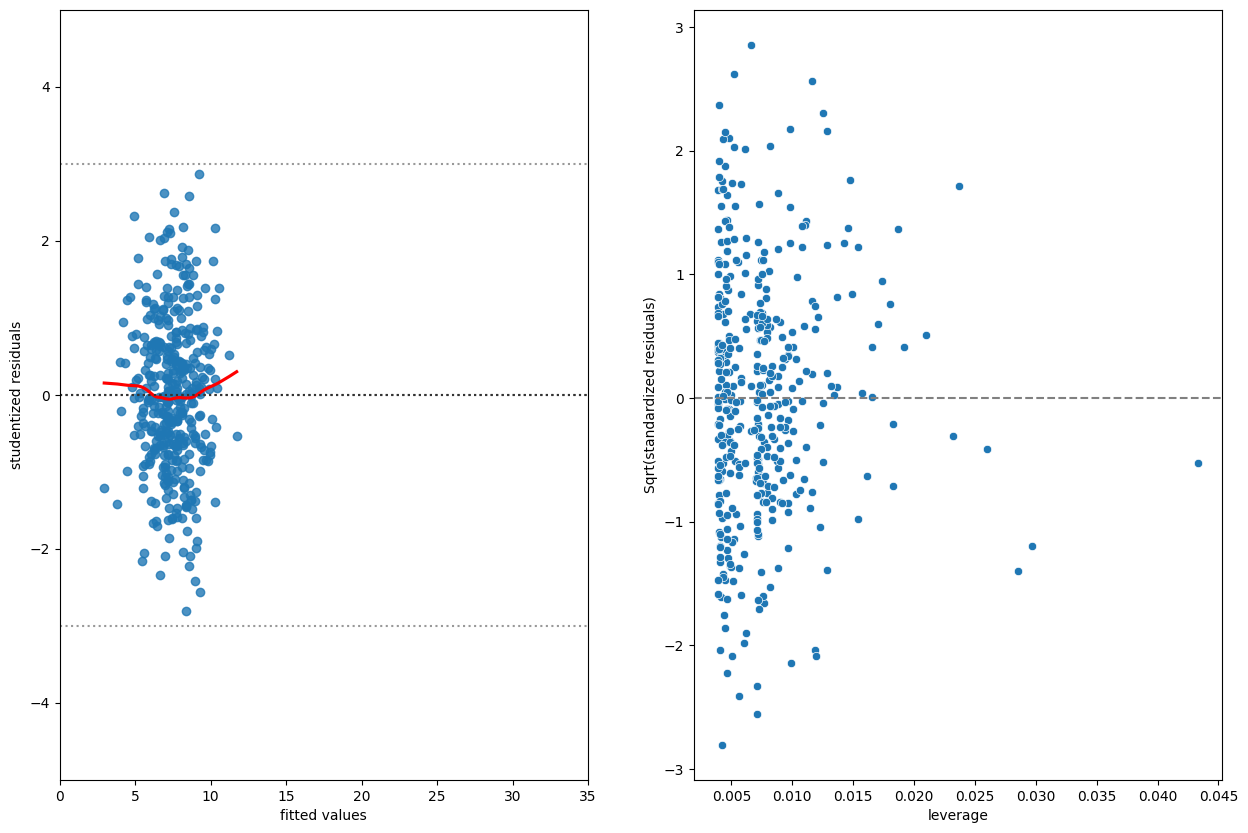

In [106]:
f, axes = plt.subplots(1, 2, sharex=False, sharey=False)
f.set_figheight(10)
f.set_figwidth(15)

# studentized - fitted values plot
y_pred = carseats_ml.predict()
stud_resid = carseats_ml.get_influence().resid_studentized_internal

ax1 = sns.residplot(x=y_pred, y=stud_resid, ax=axes[0], lowess=True, line_kws=dict(color="r"))
ax1.set_xlabel('fitted values')
ax1.set_ylabel('studentized residuals')
ax1.axhline(0, ls=":", c=".2")
ax1.axhline(-3, ls=":", c=".6")
ax1.axhline(3, ls=":", c=".6")
ax1.set_xlim(0, 35)
ax1.set_ylim(-5, 5)

# leverage plot
stand_resids = carseats_ml.resid_pearson
leverage = carseats_ml.get_influence().hat_matrix_diag
ax2 = sns.scatterplot(x=leverage, y=stand_resids, ax=axes[1])
ax2.set_xlabel('leverage')
ax2.set_ylabel('Sqrt(standardized residuals)')
ax2.axhline(y=0, color='grey', linestyle='dashed')

### Question 11

In [107]:
np.random.seed(1)

x = np.random.normal(size=100)
y = 2*x + np.random.normal(size=100)

In [108]:
simple_lm = sm.OLS(y, x).fit()
simple_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Wed, 09 Jul 2025   Prob (F-statistic):                    3.46e-36
Time:                        13:37:41   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
simple_lm2 = sm.OLS(x, y).fit()
simple_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Wed, 09 Jul 2025   Prob (F-statistic):                    3.46e-36
Time:                        13:37:41   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Performance stats looks same, but coefficients differ

(d)

Recall the logic in RSS (since $\hat{\beta}_0$ = 0 and $\hat{y} = x\hat{\beta}$)
$$ \text{RSS} = \sum(y-x\hat{\beta}) $$
$$ \text{RSS} = \sum y^2 - 2\hat{\beta}\sum xy + \hat{\beta}^2 \sum x^2 $$
$$ \text{RSS} = \frac{\sum y^2 \sum x^2 - (\sum xy)^2}{\sqrt{n-1} \sum x^2} $$

--- 

$$ SE(\hat{\beta}) = = \sqrt{\frac{\sum(y-x\hat{\beta}}{(n-1) \sum x^2}}  = \sqrt{\frac{\frac{\sum y^2 \sum x^2 - (\sum xy)^2}{\sum x^2}}{(n-1) \sum x^2}} = \sqrt{\frac{{\sum y^2 \sum x^2 - (\sum xy)^2}}{(n-1) (\sum x^2)^2}}$$

$$ t = \frac{\hat{\beta}}{SE(\hat{\beta})} = \frac{\sum xy}{\sum x^2} \times \frac{\sqrt{n-1} \sqrt{(\sum x^2)^2}}{\sum y^2 \sum x^2 - (\sum xy)^2} = \frac{\sqrt{n-1} \sum xy}{\sum y^2 \sum x^2 - (\sum xy)^2}$$

(e)

$$ t_{(x,y)} = \frac{\sqrt{n-1} \sum xy}{\sum y^2 \sum x^2 - (\sum xy)^2} = \frac{\sqrt{n-1} \sum yx}{\sum x^2 \sum y^2 - (\sum yx)^2} = t_{(y,x)}$$

In [110]:
simple_lm3 = sm.OLS(y, sm.add_constant(x)).fit()
simple_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Wed, 09 Jul 2025   Prob (F-statistic):                    3.46e-36
Time:                        13:37:41   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
simple_lm3 = sm.OLS(x, sm.add_constant(y)).fit()
simple_lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           5.39e-36
Time:                        13:37:41   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.279      -0.124       0.036
x1             0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 12

(a) 
$$ \hat{\beta}_a = \frac{\sum xy}{\sum x^2} = \frac{\sum xy}{\sum y^2} = \hat{\beta}_b $$
If 
$$ \sum x^2 == \sum y^2 $$ 

In [112]:
np.random.seed(1)
x = np.random.normal(size=100)
y = np.random.normal(size=100)

model_xy = sm.OLS(y, x).fit()
model_yx = sm.OLS(x, y).fit()

model_xy.params[0], model_yx.params[0]

(0.10674168895911532, 0.09420152580042446)

In [113]:
# y = -x

np.random.seed(1)
x = np.random.normal(size=100)
y = x*-1

model_xy = sm.OLS(y, x).fit()
model_yx = sm.OLS(x, y).fit()

model_xy.params[0], model_yx.params[0]

(-1.0, -1.0)

### Question 13

In [114]:
np.random.seed(1)
x = np.random.normal(size=100)
eps = np.random.normal(size=100, scale=0.25)

In [115]:
y = -1 + 0.5 * x + eps

- length: 100
- $\beta_0 = -1$
- $\beta_1 = 0.5$

<Axes: >

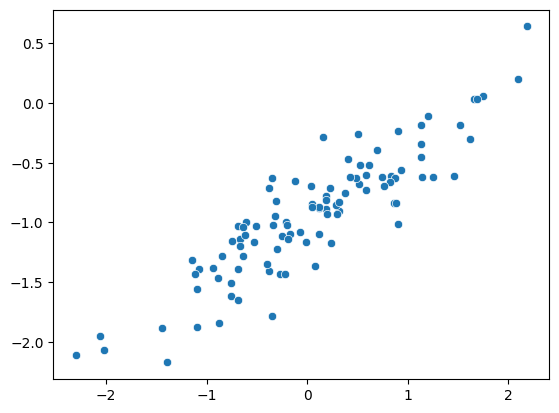

In [116]:
sns.scatterplot(x=x,y=y)

In [117]:
least_squares_model = sm.OLS(y,sm.add_constant(x)).fit()
least_squares_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           5.39e-36
Time:                        13:37:42   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x1             0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

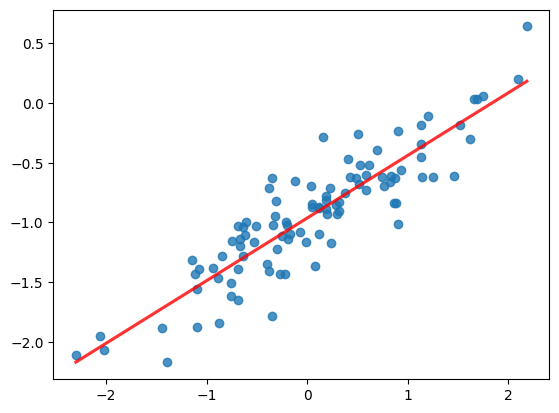

In [118]:
## todo: add population regression line
sns.regplot(x=x, y=y, line_kws={'color': 'red', 'alpha': 0.8, 'label': 'fitted line'}, ci=False)

In [119]:
df = pd.DataFrame({'y': y, 'x': x})

poly_model = smf.ols(formula='y ~ x + np.power(x, 2)', data=df).fit()
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.32e-34
Time:                        13:37:42   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x                  0.5234      0.027     19.582      0.000       0.470       0.576
np.power(x, 2)     0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No improvement after adding the quadratic term, also the quadratic term has high p-value

<Axes: >

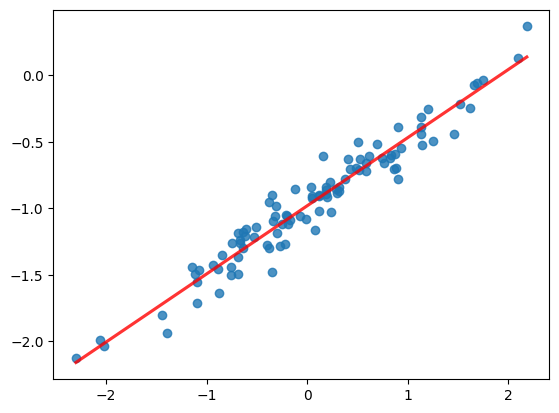

In [120]:
# same model with low noise
np.random.seed(1)
x_low_noise = np.random.normal(size=100)
eps_low_noise = np.random.normal(size=100, scale=0.125)
y_low_noise = -1 + 0.5 * x_low_noise + eps_low_noise

# todo: add population regression line
sns.regplot(x=x_low_noise, y=y_low_noise, line_kws={'color': 'red', 'alpha': 0.8, 'label': 'fitted line'}, ci=False)

In [121]:
less_noisy_model = sm.OLS(y_low_noise,sm.add_constant(x_low_noise)).fit()
less_noisy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1495.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           3.81e-61
Time:                        13:37:42   Log-Likelihood:                 73.506
No. Observations:                 100   AIC:                            -143.0
Df Residuals:                      98   BIC:                            -137.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9816      0.012    -83.562      0.000      -1.005      -0.958
x1             0.5119      0.013     38.664      0.000       0.486       0.538
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

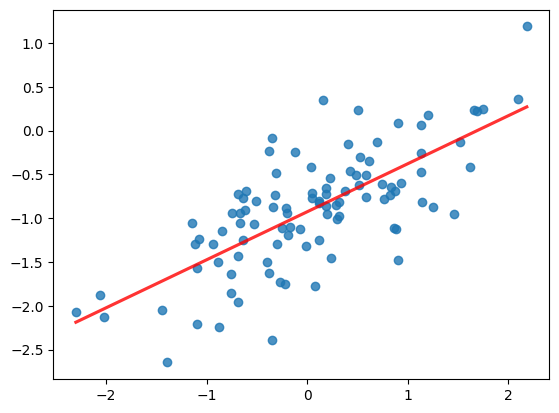

In [122]:
# same model with more noise
np.random.seed(1)
x_high_noise = np.random.normal(size=100)
eps_high_noise = np.random.normal(size=100, scale=0.5)
y_high_noise = -1 + 0.5 * x_high_noise + eps_high_noise

# todo: add population regression line
sns.regplot(x=x_high_noise, y=y_high_noise, line_kws={'color': 'red', 'alpha': 0.8, 'label': 'fitted line'}, ci=False)

In [123]:
noisier_model = sm.OLS(y_high_noise,sm.add_constant(x_high_noise)).fit()
noisier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.20e-17
Time:                        13:37:42   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x1             0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 14

In [124]:
# This problem focuses on the collinearity problem
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

In [125]:
# calculate the correlation between x1 and x2
np.corrcoef(x1, x2)

array([[1.        , 0.83905962],
       [0.83905962, 1.        ]])

<Axes: >

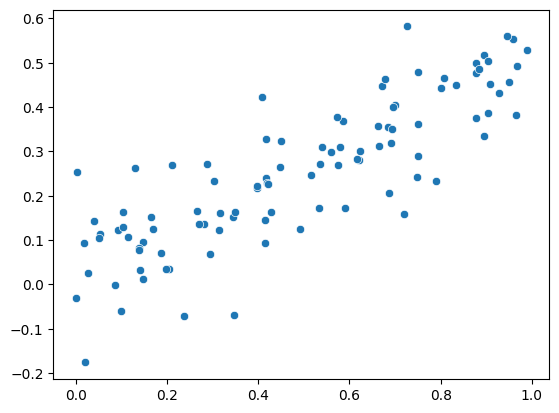

In [126]:
sns.scatterplot(x=x1, y=x2)

In [127]:
df = pd.DataFrame({ 'y': y, 'x1': x1, 'x2': x2 })
collinearity_model = smf.ols(formula='y ~ x1 + x2', data=df).fit()
collinearity_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           4.40e-07
Time:                        13:37:42   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

True values:
- $\beta_0$ = 2
- $\beta_1$ = 2
- $\beta_2$ = 0.3

Estimated Coefficients:
- $\hat{\beta}_0$ = 2.1893
- $\hat{\beta}_1$ = 0.7046
- $\hat{\beta}_2$ = 2.5024

Hypothesis Testing Results:
- p_value for $x_1$ is 0.271 => We cannot reject $H_0$
- p_value for $x_2$ is 0.031 => We can reject $H_0$

In [128]:
coll_model_2 = sm.OLS(y, sm.add_constant(x1)).fit()
coll_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           6.68e-07
Time:                        13:37:42   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Result:
- p_value << 0.000, so we can reject the null hypothesis

In [129]:
coll_model_3 = sm.OLS(y, sm.add_constant(x2)).fit()
coll_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.09e-07
Time:                        13:37:42   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.000       1.895       2.636
x1             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Result:
- p_value << 0.000, so we can reject the null hypothesis

(f)
There is no contradiction between result of question c and question e

In [130]:
additional_observation = {'x1': 0.1, 'x2': 0.8, 'y': 6}
df2 = pd.concat([df, pd.DataFrame([additional_observation])], ignore_index=True)

In [131]:
collinearity_model_add = smf.ols(formula='y ~ x1 + x2', data=df2).fit()
collinearity_model_add.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           5.51e-08
Time:                        13:37:42   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.000       1.804       2.595
x1             0.2200      0.520      0.423      0.673      -0.812       1.252
x2             3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Estimated Coefficients:
- $\hat{\beta}_0$ = 2.1996
- $\hat{\beta}_1$ = 0.2200
- $\hat{\beta}_2$ = 3.4392

Hypothesis Testing Results:
- p_value for $x_1$ is 0.673 => We cannot reject $H_0$
- p_value for $x_2$ is 0.000 => We can reject $H_0$

In [132]:
coll_model_2_add = smf.ols(formula='y ~ x1', data=df2).fit()
coll_model_2_add.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           9.15e-06
Time:                        13:37:42   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.000       1.945       2.771
x1             1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
coll_model_3_add = smf.ols(formula='y ~ x2', data=df2).fit()
coll_model_3_add.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           7.41e-09
Time:                        13:37:42   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.000       1.872       2.594
x2             3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 15

In [134]:
boston = pd.read_csv('../../data/boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [135]:
def simple_lr_builder(data, response, poly=False):
    p_values = []
    coefficients = []
    predictors = boston.drop([response], axis=1).columns
    for predictor in predictors:
        if not(poly):
            formula = f'{response} ~ {predictor}'
        else:
            formula = f'{response} ~ {predictor} + np.power({predictor}, 2) + np.power({predictor}, 3)'
        model = smf.ols(formula, data=data).fit()
        p_values.append({predictor: format(model.pvalues.loc[predictor], '.3f')})
        coefficients.append(model.params[1])
        if poly:
            print(model.summary())
    return p_values, coefficients

In [136]:
# fit a simple linear regression for each predictor to predict per capita crime
p_values, _ = simple_lr_builder(boston, 'crim')
p_values

C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(

[{'zn': '0.000'},
 {'indus': '0.000'},
 {'chas': '0.209'},
 {'nox': '0.000'},
 {'rm': '0.000'},
 {'age': '0.000'},
 {'dis': '0.000'},
 {'rad': '0.000'},
 {'tax': '0.000'},
 {'ptratio': '0.000'},
 {'lstat': '0.000'},
 {'medv': '0.000'}]

Except `chas`, all others are looking statistically significant

In [137]:
x = boston.drop(['crim'], axis=1)
y = boston['crim']
boston_ml = sm.OLS(y, sm.add_constant(x)).fit()
boston_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.03e-56
Time:                        13:37:43   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For `zn`, `dis`, `rad`, `medv` we can reject the null hypothesis $H_j: \beta_j = 0$

C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(

Text(0, 0.5, 'Multiple Linear Reg. Coefficients')

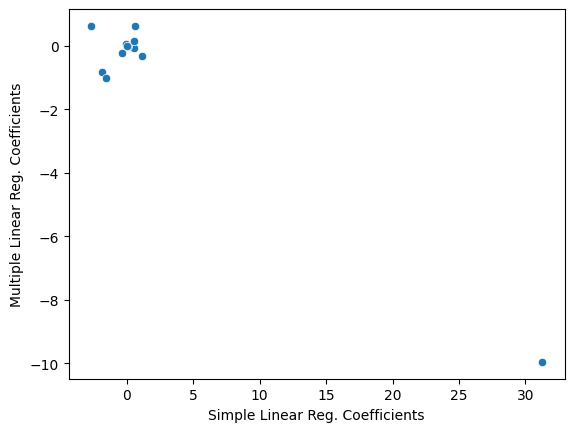

In [138]:
_, slr_coeffs = simple_lr_builder(boston, 'crim')
mlr_coeffs = boston_ml.params[1:]

ax = sns.scatterplot(x=slr_coeffs, y=mlr_coeffs)
ax.set_xlabel('Simple Linear Reg. Coefficients')
ax.set_ylabel('Multiple Linear Reg. Coefficients')

In [139]:
# fit a simple polynomial regression for each predictor to predict per capita crime
simple_lr_builder(boston, 'crim', poly=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.28e-06
Time:                        13:37:43   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     

C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_16528\3609340802.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(

([{'zn': '0.003'},
  {'indus': '0.000'},
  {'chas': '0.209'},
  {'nox': '0.000'},
  {'rm': '0.212'},
  {'age': '0.143'},
  {'dis': '0.000'},
  {'rad': '0.623'},
  {'tax': '0.110'},
  {'ptratio': '0.003'},
  {'lstat': '0.335'},
  {'medv': '0.000'}],
 [-0.3321884147218922,
  -1.965212934306422,
  -0.6309255169345852,
  -1279.3712516621817,
  -39.15013633706878,
  0.2736531305604491,
  -15.55435348805103,
  0.5127360382141227,
  -0.15330961298734702,
  -82.36053772091336,
  -0.4490655871647836,
  -5.094830543444562])